![banner](banner.png)

# Convolutional Neural Networks - Lab 2.
## Maestría en Ciencias de la Computación.
### Guillermo Reyes Martínez.

![Instrucciones](LAB2-1.png)

In [65]:
#First we shall import opencv, numpy and matplotlib libraries as they´re going to be useful for reading our images,
#treat them as matrixes and display our results.
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import copy

In [66]:
#This code reads the image previously stored on the same folder as this notebook, first parameter corresponds to image's name,
#second parameter "0", means it shall be read as a grayscale image.
image = cv2.imread("lena.png", 0)
image1_1 = cv2.imread("lena.png", 0)
image1_2 = cv2.imread("lena.png", 0)
image1_3 = cv2.imread("lena.png", 0)
image1_4 = cv2.imread("lena.png", 0)
image1_5 = cv2.imread("lena.png", 0)
#This line returns me the size of the image in pixels, will be usefull for the zero padding function and the filter function.
x, y = image.shape[:2]
print(x, y)

512 512


The Sobel operator, sometimes called the Sobel–Feldman operator or Sobel filter, is used in image processing and computer vision, particularly within edge detection algorithms where it creates an image emphasising edges. It is named after Irwin Sobel and Gary Feldman, colleagues at the Stanford Artificial Intelligence Laboratory (SAIL). Sobel and Feldman presented the idea of an "Isotropic 3 × 3 Image Gradient Operator" at a talk at SAIL in 1968.

The operator uses two 3×3 kernels which are convolved with the original image to calculate approximations of the derivatives – one for horizontal changes, and one for vertical. If we define A as the source image, and Gx and Gy are two images which at each point contain the horizontal and vertical derivative approximations respectively, the computations are as follows:

![sobel kernel](sobel_kernel.png)

In [67]:
#Time to apply the padding to our image, so we can run our previosly defined kernel.
#This function is only used to prove how zero padding works.
def zero_padding(img, filtersize, x, y):
    #Rows and Columns are defined so that our filter will always fit.
    R = x + filtersize - 1
    C = y + filtersize - 1
    Z = np.zeros((R,C))
    for i in range (x):
        for j in range (y):
            Z[i + ((filtersize-1)//2), j + ((filtersize-1)//2)] = image[i,j]
    return Z 

In [68]:
print(image)
zero_padding(image, 3, x, y)

[[169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 ...
 [ 53  53  59 ... 115 112 114]
 [ 53  53  64 ... 117 118 122]
 [ 53  53  64 ... 117 118 122]]


array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0., 169., 169., ..., 162., 138.,   0.],
       [  0., 169., 169., ..., 162., 138.,   0.],
       ...,
       [  0.,  53.,  53., ..., 118., 122.,   0.],
       [  0.,  53.,  53., ..., 118., 122.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [69]:
def sobelFilter(data, orientation):
    x, y = data.shape
    #This kernels corresponds to sobel's operator, for x and y direction.
    if (orientation == 0):
        kernel = [(1, 0, -1),
                 (2, 0, -1),
                 (1, 0, -1)]
    elif (orientation == 1):
        kernel = [(1, 2, 1),
                 (0, 0, 0),
                 (-1, -2, -1)]
    #Here we just adjust our Rows and Columns to create a empty matrix with the zero padding we need.
    R = x + 3 - 1
    C = y + 3 - 1
    Z = np.zeros((R,C))
    #Same as always one for loop for each axis.
    for i in range (x):
        for j in range(y):
            #Here we add the zero padding by asignin the original data to their corresponding coordinate in x, y.
            Z[i + int((3 - 1)/2), j + int((3 - 1)/2)] = data[i][j]
            #k is a variable that helps us to take slices of the full image data.
            k = Z[i:i + 3, j:j + 3]
            #l is a dummy variable where we multiply all the slice of k by our filter and sum everything to get the average
            #value of the neighborhood
            l = np.sum(np.multiply(k, kernel))
            #Finally we assing each l value to their corresponding index.
            data[i][j] = l
    return data

In [70]:
image2 = sobelFilter(image1_1, 0)
image3 = sobelFilter(image1_2, 1)

In [71]:
print(image2)
print(image3)

[[  0  82  82 ... 100  94  68]
 [ 87  83  84 ... 116 131 230]
 [ 87  83  84 ... 116 131 230]
 ...
 [200 103 103 ... 231 235  77]
 [203 100 100 ... 232 235  92]
 [203  95  98 ... 227 229  98]]
[[  0   0   0 ...   0   0   0]
 [251 163 160 ... 178 125 182]
 [251 163 160 ... 178 125 182]
 ...
 [168 227 233 ... 193 185  71]
 [159 218 230 ... 200 197  84]
 [159 223 242 ... 211 219 106]]


True

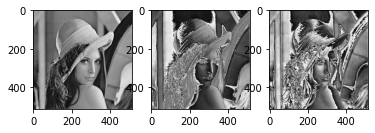

In [72]:
plt.subplot(1,3,1), plt.imshow(image, cmap='gray')
plt.subplot(1,3,2), plt.imshow(image2, cmap='gray')
plt.subplot(1,3,3), plt.imshow(image3, cmap='gray')
plt.show
cv2.imwrite('lena_sobel_vertical.png',image2)
cv2.imwrite('lena_sobel_horizonal.png',image3)

As we can see, our filter succesfully highlights vertical and horizontal edges succesfully!

The Laplacian is a 2-D isotropic measure of the 2nd spatial derivative of an image. The Laplacian of an image highlights regions of rapid intensity change and is therefore often used for edge detection. The Laplacian filter is often applied to an image that has first been smoothed with something approximating a Gaussian smoothing filter in order to reduce its sensitivity to noise, and hence the two variants will be described together here. The operator normally takes a single graylevel image as input and produces another graylevel image as output.

Since the input image is represented as a set of discrete pixels, we have to find a discrete convolution kernel that can approximate the second derivatives in the definition of the Laplacian. 

This are two of the most commonly used kernels
![a](laplaciankernel.png)

![Instrucciones](LAB2-2.png)

In [73]:
def laplacianFilter(data):
    x, y = data.shape
    kernel = [(0, 1, 0),
              (1, -4, 1),
              (0, 1, 0)]
    #Here we just adjust our Rows and Columns to create a empty matrix with the zero padding we need.
    R = x + 3 - 1
    C = y + 3 - 1
    Z = np.zeros((R,C))
    #Same as always one for loop for each axis.
    for i in range (x):
        for j in range(y):
            #Here we add the zero padding by asignin the original data to their corresponding coordinate in x, y.
            Z[i + int((3 - 1)/2), j + int((3 - 1)/2)] = data[i][j]
            #k is a variable that helps us to take slices of the full image data.
            k = Z[i:i + 3, j:j + 3]
            #l is a dummy variable where we multiply all the slice of k by our filter and sum everything to get the average
            #value of the neighborhood
            l = np.sum(np.multiply(k, kernel))
            #Finally we assing each l value to their corresponding index.
            data[i][j] = l
    return data

In [74]:
image4 = laplacianFilter(image1_3)
print(image4)

[[ 92   5   9 ... 246  39 122]
 [  5 174 177 ... 165 201   4]
 [  5 174 177 ... 165 201   4]
 ...
 [100 153 132 ...  24  32  21]
 [ 97 150 112 ...  18  13   0]
 [ 97 150 117 ...  20  19   8]]


True

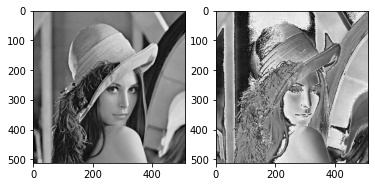

In [75]:
plt.subplot(1,2,1), plt.imshow(image, cmap='gray')
plt.subplot(1,2,2), plt.imshow(image4, cmap='gray')
plt.show
cv2.imwrite('lena_laplacian.png',image4)

As we can see our filter works as expected. No need to select in which direction we want the border to be detected!


![Instrucciones](LAB2-3.png)

In [76]:
def edgeDetector(data, gradient_kernel, threshold_value):
    x, y = data.shape
    
    data1 = copy.deepcopy(data)
    data2 = copy.deepcopy(data)
    data3 = copy.deepcopy(data)
    data4 = copy.deepcopy(data)
    
    if (gradient_kernel == "PREWITT"):
        
        kernel_dx = [(-1, 0, 1),
                  (-1, 0, 1),
                  (-1, 0, 1)]
        kernel_dy = [(-1, -1, -1),
                  (0, 0, 0),
                  (1, 1, 1)]
        
    elif(gradient_kernel == "SOBEL"):
        
        kernel_dx = [(1, 0, -1),
                     (2, 0, -1),
                     (1, 0, -1)]
        kernel_dy = [(1, 2, 1),
                     (0, 0, 0),
                     (-1, -2, -1)]
    
    #Here we just adjust our Rows and Columns to create a empty matrix with the zero padding we need.
    R = x + 3 - 1
    C = y + 3 - 1
    Z = np.zeros((R,C))
    Z1 = np.zeros((R,C))
    Z2 = np.zeros((R,C))
    #Same as always one for loop for each axis.
    for i in range (x):
        for j in range(y):
            #Here we add the zero padding by asignin the original data to their corresponding coordinate in x, y.
            Z[i + int((3 - 1)/2), j + int((3 - 1)/2)] = data1[i][j]
            Z1[i + int((3 - 1)/2), j + int((3 - 1)/2)] = data2[i][j]
            Z2[i + int((3 - 1)/2), j + int((3 - 1)/2)] = data3[i][j]
            #k is a variable that helps us to take slices of the full image data.
            k = Z[i:i + 3, j:j + 3]
            k1 = Z1[i:i + 3, j:j + 3]
            k2 = Z2[i:i + 3, j:j + 3]
            #l is a dummy variable where we multiply all the slice of k by our filter and sum everything to get the average
            #value of the neighborhood
            l = np.sum(np.multiply(k, kernel_dx))
            m = np.sum(np.multiply(k1, kernel_dy))
            #Finally we assing each l value to their corresponding index.
            data1[i][j] = l
            data2[i][j] = m
            data4[i][j] = math.sqrt((l**2)+(m**2))
            data3[i][j] = math.sqrt((l**2)+(m**2))
            
            if (data3[i][j] > threshold_value):
                data3[i][j] = 0
            elif(data3[i][j] <= threshold_value):
                data3[i][j] = 1
    print("the gradient's vector is: ")
    print(data4)
    print("this vector is:", len(data4))
    
    return (data1, data2, data3, data4)

In [77]:
image5 = edgeDetector(image1_4, "PREWITT", 85)

the gradient's vector is: 
[[  0 169 169 ... 178 175 162]
 [121  21  20 ...  38   8 185]
 [121  21  20 ...  38   8 185]
 ...
 [125 178 181 ...  98  97  54]
 [118 171 177 ... 104 104  66]
 [118 175 183 ... 111 118  80]]
this vector is: 512


True

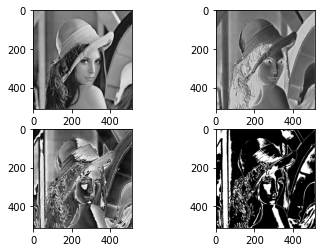

In [78]:
plt.subplot(2,2,1), plt.imshow(image, cmap='gray')
plt.subplot(2,2,2), plt.imshow(image5[0], cmap='gray')
plt.subplot(2,2,3), plt.imshow(image5[1], cmap='gray')
plt.subplot(2,2,4), plt.imshow(image5[2], cmap='gray')
plt.show
cv2.imwrite('lena_prewitt_dx.png',image5[0])
cv2.imwrite('lena_prewitt_dy.png',image5[1])
cv2.imwrite('lena_prewitt_threshold.png',image5[2])

In [79]:
image6 = edgeDetector(image1_5, "SOBEL", 200)

the gradient's vector is: 
[[  0  82  82 ... 100  94  68]
 [ 22 243 241 ...  15 233 142]
 [ 22 243 241 ...  15 233 142]
 ...
 [177 249 254 ... 248 243 210]
 [167 239 250 ... 255 254 230]
 [167 242   5 ...   7  15 250]]
this vector is: 512


<function matplotlib.pyplot.show(close=None, block=None)>

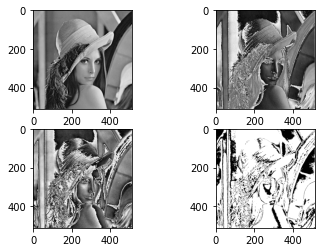

In [80]:
plt.subplot(2,2,1), plt.imshow(image, cmap='gray')
plt.subplot(2,2,2), plt.imshow(image6[0], cmap='gray')
plt.subplot(2,2,3), plt.imshow(image6[1], cmap='gray')
plt.subplot(2,2,4), plt.imshow(image6[2], cmap='gray')

cv2.imwrite('lena_SOBEL_dx.png',image6[0])
cv2.imwrite('lena_SOBEL_dy.png',image6[1])
cv2.imwrite('lena_SOBEL_threshold.png',image6[2])
plt.show